# Prediction Using Decition Tree Algorithm
## by- Tamal Majumder
* **[LINKEDIN](https://www.linkedin.com/in/tamal-majumder-4979781a3/)**
* **[GITHUB](https://github.com/t-majumder)**
* **First we load the dataset we downloaded from UCI machine learning reposetory: [Dataset Link](http://archive.ics.uci.edu/ml/datasets/Iris)**

### Explanation:
* Load the datasets and perform data description, checking for null and unique values.
* Visualize the dataset features and plot graphs to analyze relationships between features.
* Looking at the dataset visually 
    - Frob the plotted curve it is clear that Iris Setosa (Blue curve) is more descrete so it will bw showing more accurate result and will train easily
    - Iris Versicolor (Orange curve) and Iris Virginica's (Green curve) data are very close to each other which is visible in the graph. it basically means they look kind of similar to each other.
* Create new features and analyze their relationships based on the class label.
* Clean the dataset by dropping unnecessary columns.
* Split the dataset into training and testing datasets.
### Building and training the model
* Build the ML model.
* Train the model using the training dataset and evaluate its performance on the testing dataset.
### Testing
* Validate the training and testing datasets.
* Assess the model's performance by testing it with manually created datasets instead of the provided testing datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading up the dataset

In [52]:
iris = pd.read_csv('D:\\Data science and ml projects\\6.Prediction Using Decision Tree\\Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
iris.shape

(150, 6)

### Checking all the values and trying to find error

In [54]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### To Check Null Value

In [55]:
# To Check Null Value
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### To check Unique value

In [56]:
# to check Unique value
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [57]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [58]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Visualizing the dataset features to find pattern to solve our task

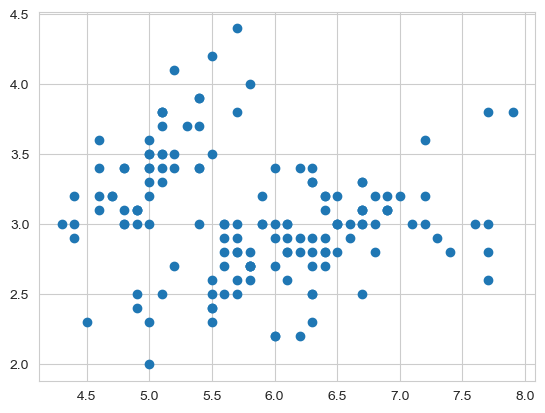

In [59]:
#Visualizing the dataset features to find pattern to solve our task

plt.scatter(iris['SepalLengthCm'],iris['SepalWidthCm'])
plt.show()

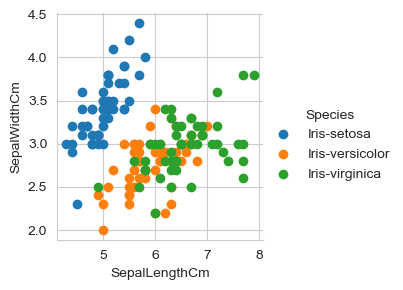

In [60]:
#Using Seaborn lib to visualized 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(iris, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

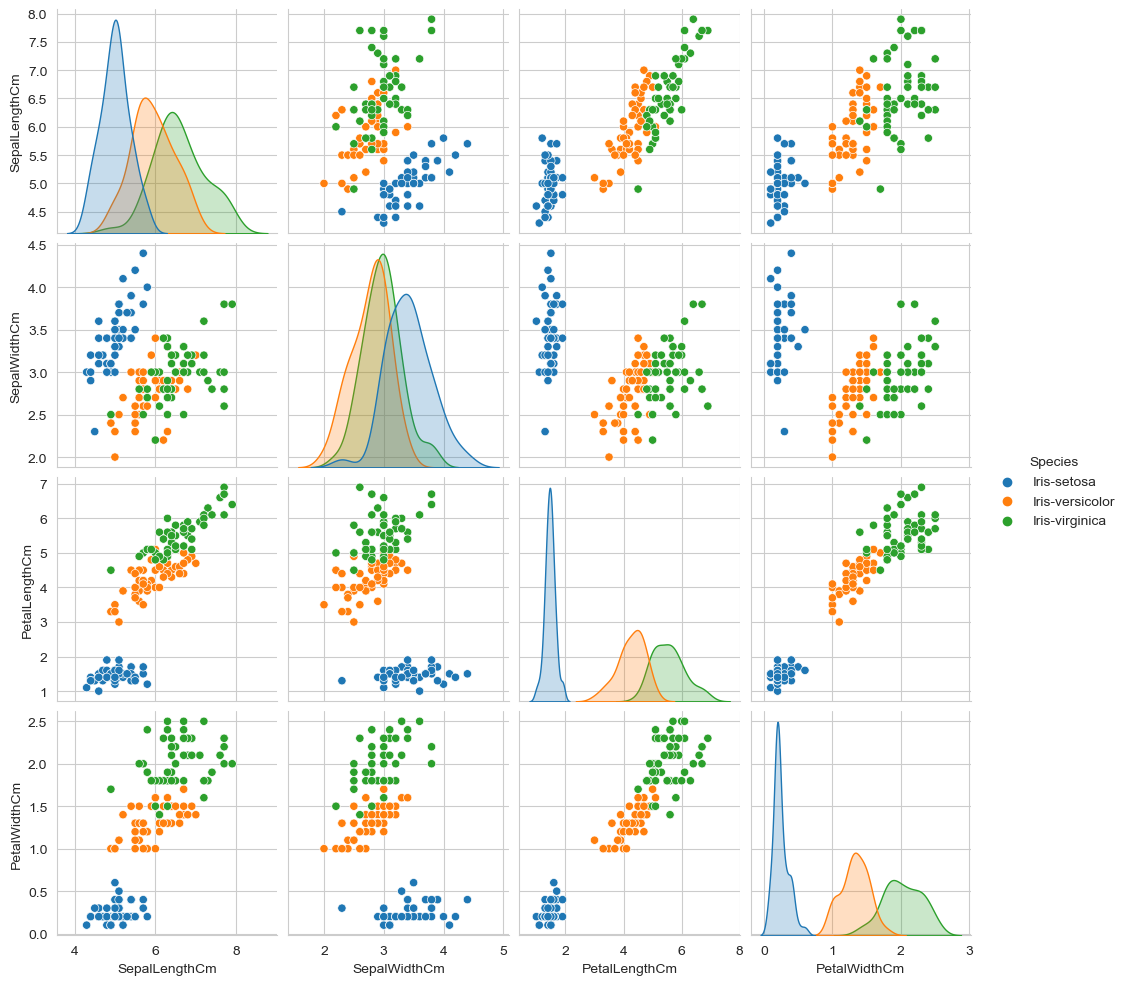

In [61]:
#Pair plot gives the relationship b/w all features distribution with each other..

sns.pairplot(iris.drop(['Id'],axis=1), hue='Species')
plt.show()

### Just trying to explore some new feature using the given data...

In [62]:
#Just trying to explore some new feature using the given data...

iris['Sepal_diff'] = iris['SepalLengthCm']-iris['SepalWidthCm']
iris['petal_diff'] = iris['PetalLengthCm']-iris['PetalWidthCm']
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2


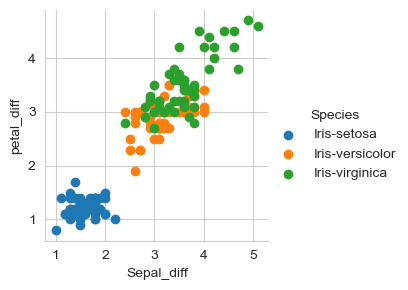

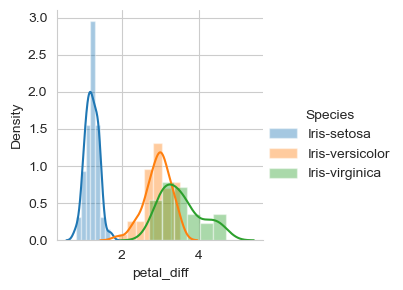

In [63]:
#Analysed new feature to get some more infomation apart form existing ones...
sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
   .map(plt.scatter,'Sepal_diff','petal_diff')\
   .add_legend()
plt.show()    


sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
   .map(sns.distplot,'petal_diff')\
   .add_legend()
plt.show() 


In [64]:
iris['Sepal_petal_len_diff'] = iris['SepalLengthCm']-iris['PetalLengthCm']
iris['Sepal_petal_width_diff'] = iris['SepalWidthCm']-iris['PetalWidthCm']
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4


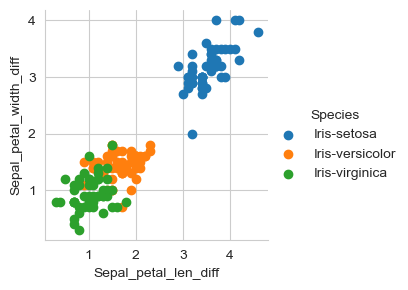

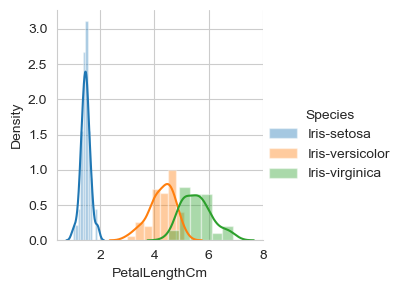

In [65]:
import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
   .map(plt.scatter,'Sepal_petal_len_diff','Sepal_petal_width_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
   .map(sns.distplot,'PetalLengthCm')\
   .add_legend()
plt.show()

In [66]:
iris['Sepal_petal_len_wid_diff'] = iris['SepalLengthCm']-iris['PetalWidthCm']
iris['Sepal_petal_wid_len_diff'] = iris['SepalWidthCm']-iris['PetalLengthCm']
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2


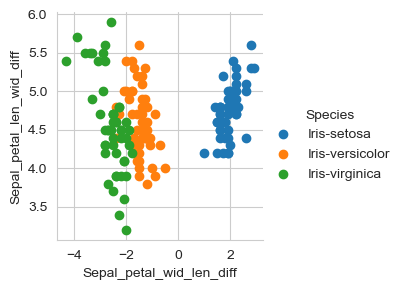

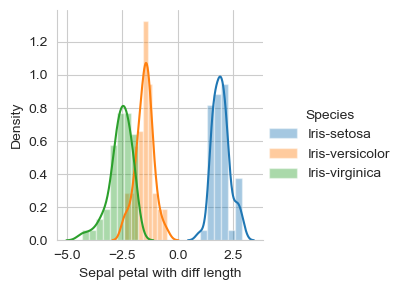

In [87]:
sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
   .map(plt.scatter,'Sepal_petal_wid_len_diff','Sepal_petal_len_wid_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
   .map(sns.distplot,'Sepal_petal_wid_len_diff')\
   .add_legend()
plt.xlabel('Sepal petal with diff length')
plt.show()

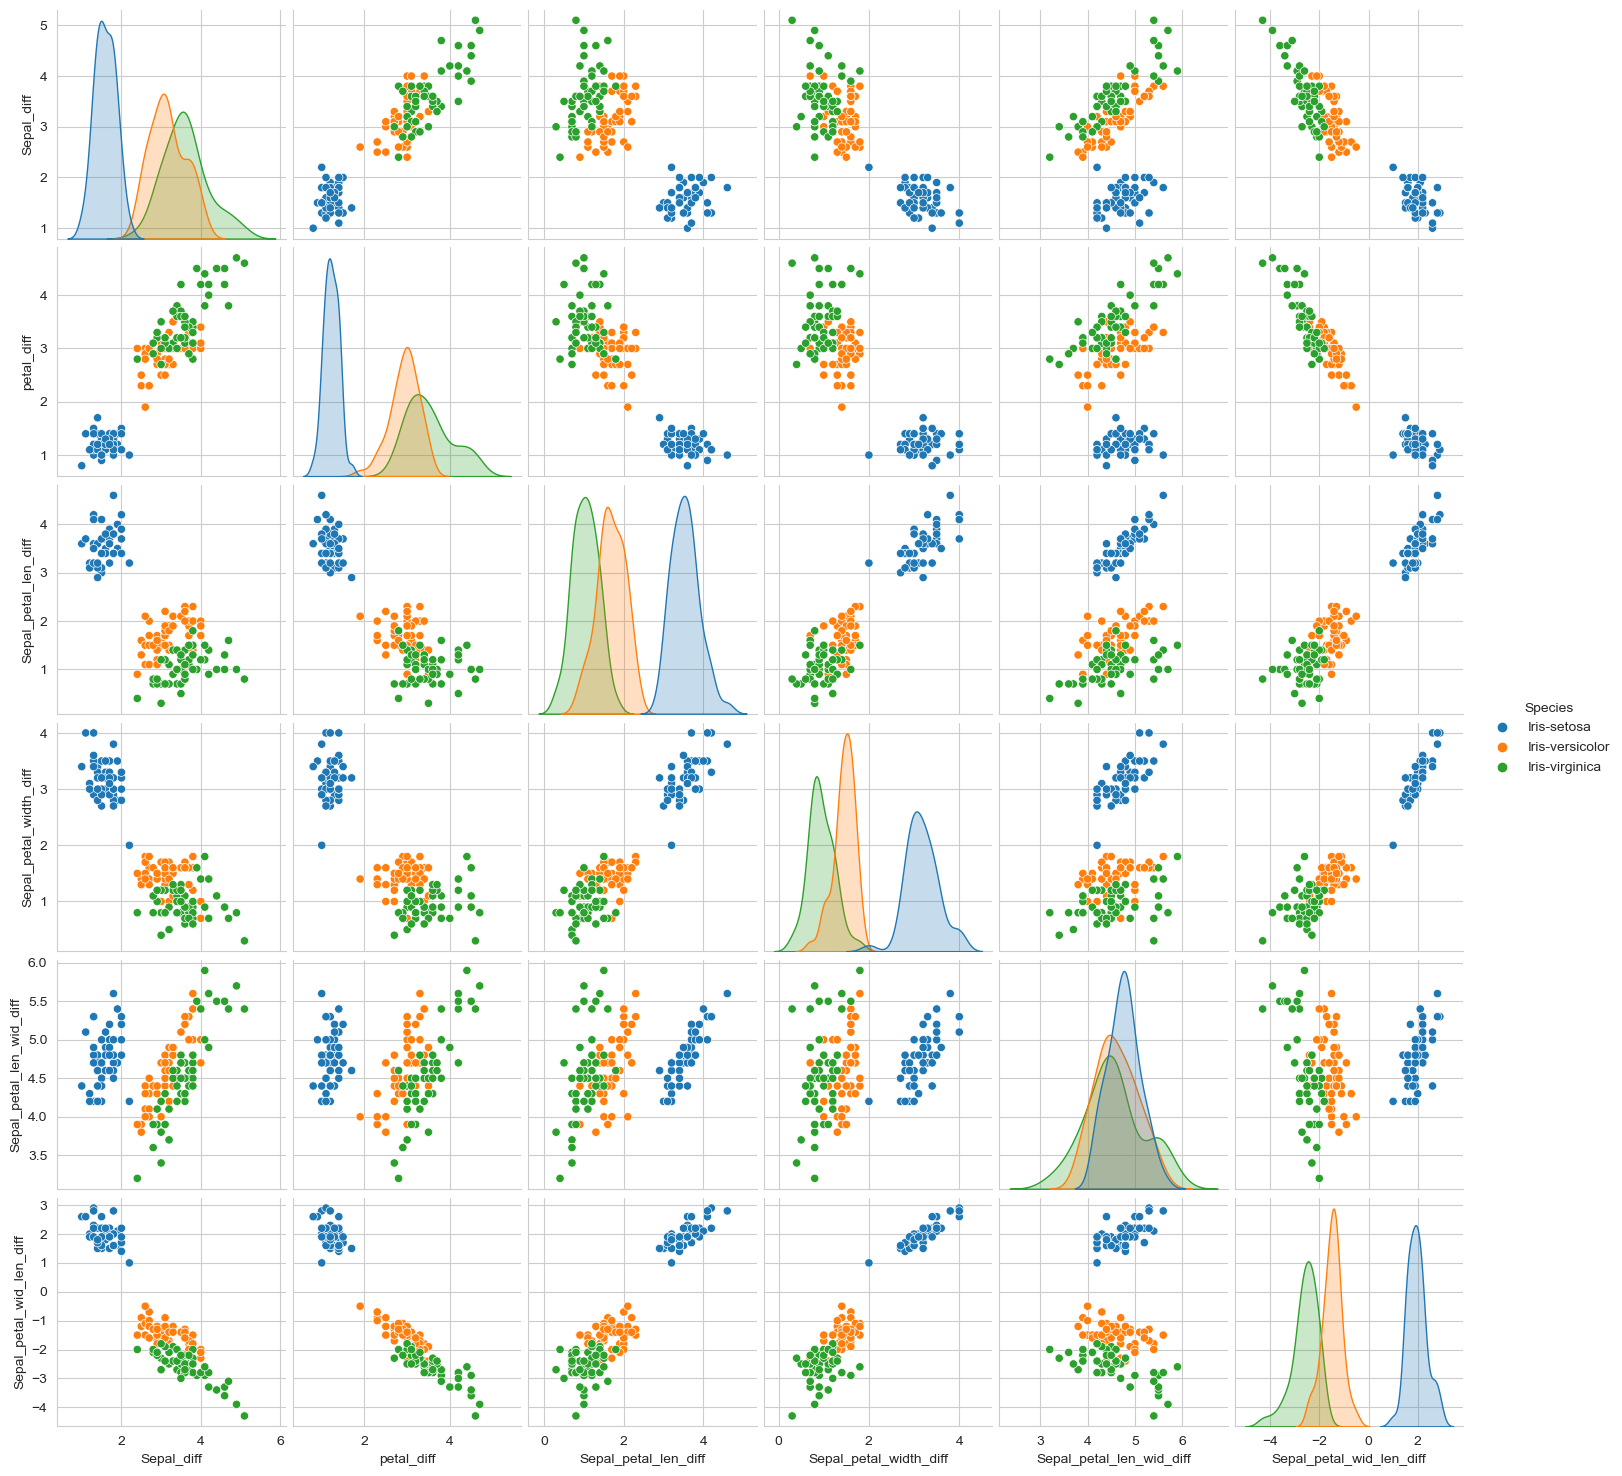

In [72]:
# Finding relationship b/w new feature based on class labels...

sns.pairplot(iris[['Species', 'Sepal_diff', 'petal_diff', 'Sepal_petal_len_diff',\
       'Sepal_petal_width_diff', 'Sepal_petal_len_wid_diff',\
       'Sepal_petal_wid_len_diff']], hue='Species')
plt.show()

In [73]:
# Check the column names in the iris DataFrame
print(iris.columns)

# Output the column names

# If 'Id' is present, you can proceed with dropping it
if 'Id' in iris.columns:
    iris.drop(['Id'], axis=1, inplace=True)
    print("Column 'Id' dropped successfully.")
else:
    print("Column 'Id' not found.")

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Sepal_diff', 'petal_diff', 'Sepal_petal_len_diff',
       'Sepal_petal_width_diff', 'Sepal_petal_len_wid_diff',
       'Sepal_petal_wid_len_diff'],
      dtype='object')
Column 'Id' not found.


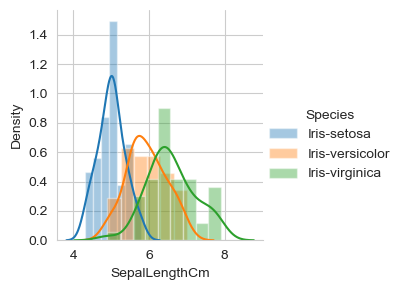

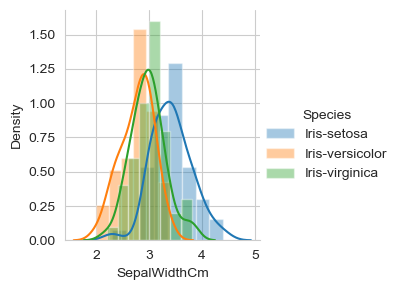

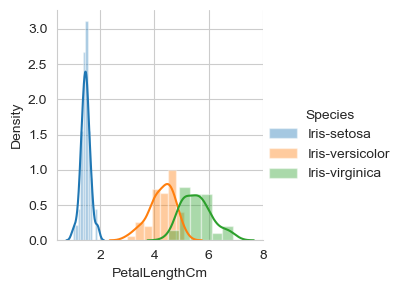

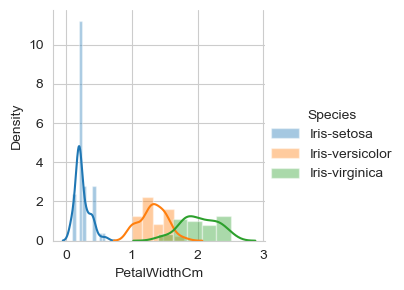

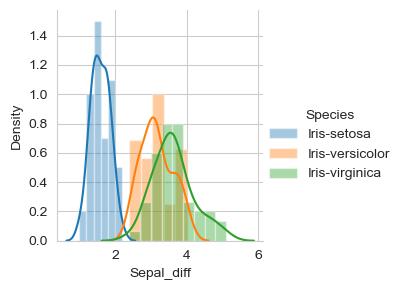

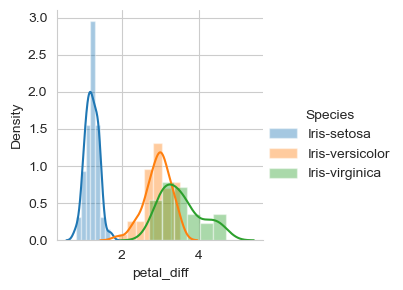

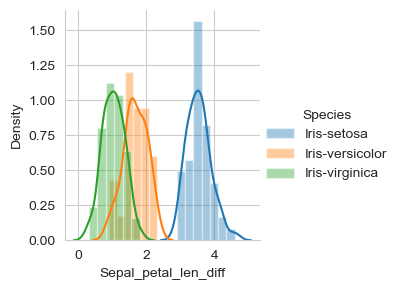

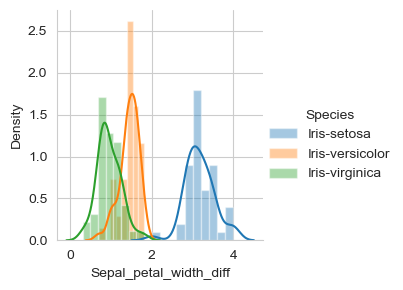

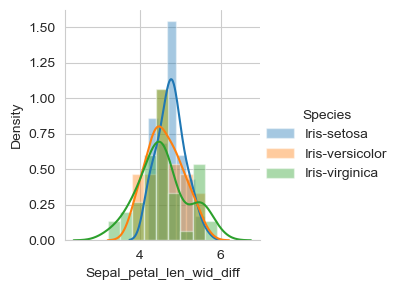

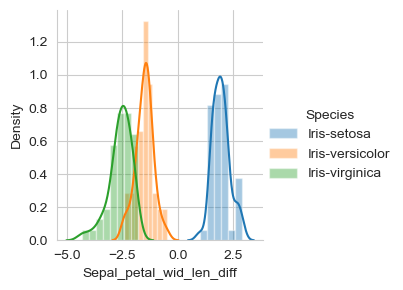

In [74]:
#exploring distribution plot for all features

for i in iris.columns:
    if i == 'Species':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(iris,hue='Species')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

## Creating a Model to solve our task

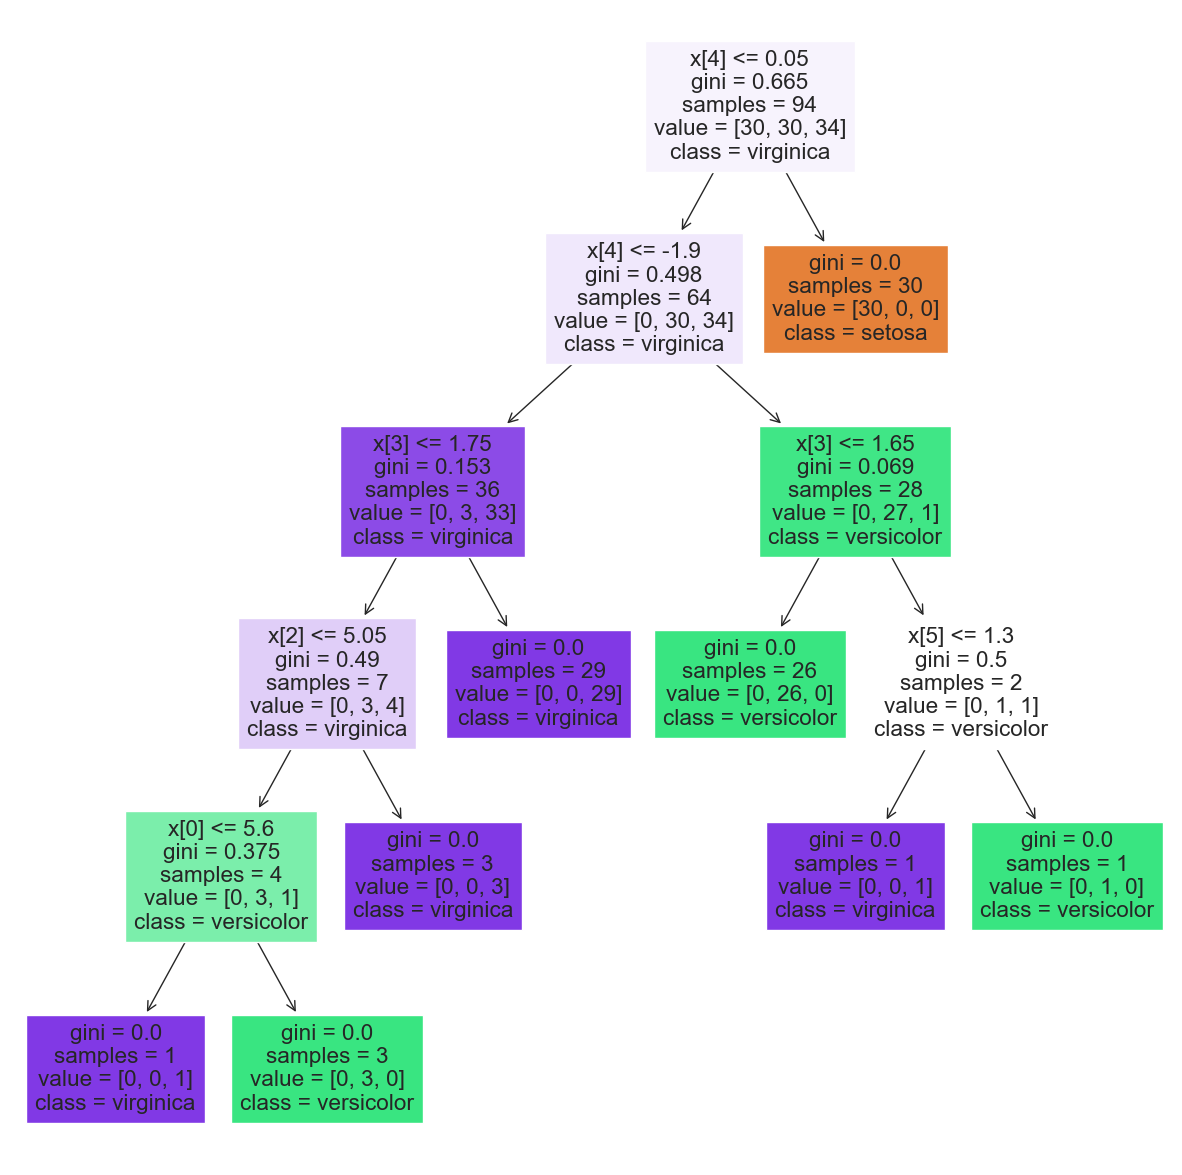

In [75]:
#Now try to create a model to solve our task
#As per our analysis, we can't find much information from new feature which can helpful in solving our problem...
#For solving our task I have selected few features amongs all to build up our best model..

'''Imporing few library for create Decision tree classifier and visualizing the tree structure'''

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Here we separating independent varibles or target varibles from Iris dataset'''


X = iris[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm','Sepal_petal_wid_len_diff','Sepal_petal_width_diff']]
y = iris['Species']


#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


'''Now we have create a Decision tree classifier and trained it with training dataset.'''


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

#Visualized the Tree which is formed on train dataset
plt.figure(figsize = (15,15))
classnames=['setosa', 'versicolor', 'virginica']
tree.plot_tree(Iris_clf, filled=True, class_names=classnames)
plt.show()

In [77]:
# As our model has been trained....
#Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.


print('Accuracy score is:',100*cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean(),'%')

Accuracy score is: 92.54032258064517 %


In [78]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]], dtype=int64)

In [79]:
#Checking our model performance on actual unseen test data.. 
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int64)

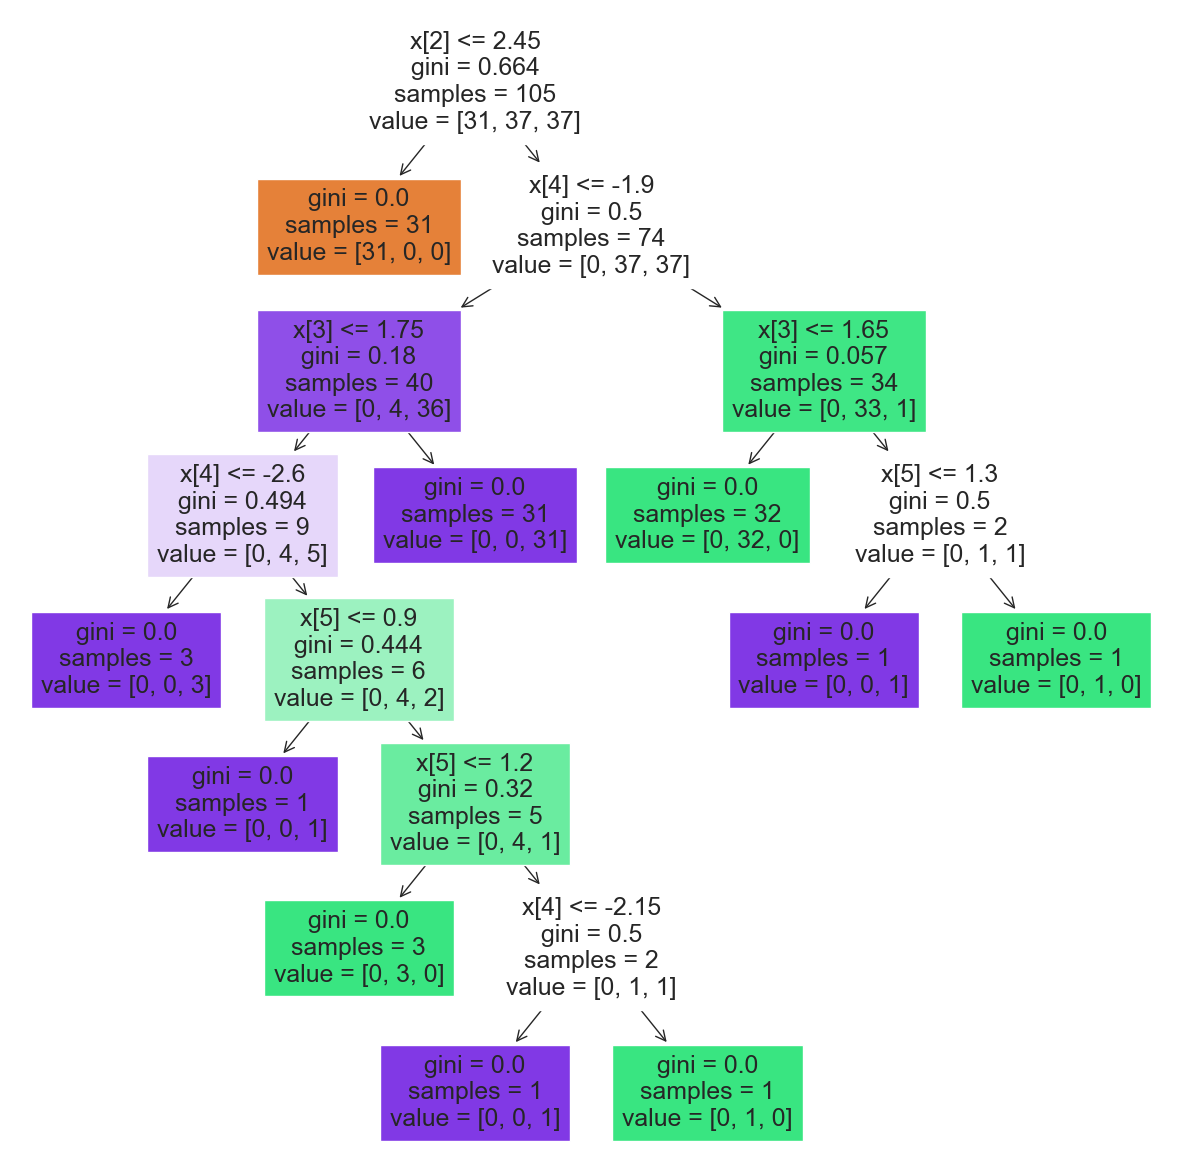

In [80]:
'''Training model on Actual train data... '''
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

#Visualize tree structure..
plt.figure(figsize = (15,15))
tree.plot_tree(Iris_Fclf, filled = True)
plt.show()

In [81]:
#Checking the performance of model on Actual Test data...

YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 97.77777777777777 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 1, 12]],

       [[31,  1],
        [ 0, 13]]], dtype=int64)

In [82]:
#Testing for New points except from Dataset

Test_point = [[5.4,3.0,4.5,1.5,-1.5,1.5],
             [6.5,2.8,4.6,1.5,-1.8,1.3],
             [5.1,2.5,3.0,1.1,-0.5,1.4],
             [5.1,3.3,1.7,0.5,1.6,2.8],
             [6.0,2.7,5.1,1.6,-2.4,1.1],
             [6.0,2.2,5.0,1.5,-2.8,0.7]]

print(Iris_Fclf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']
